In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfc=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/HIV/no_of_cases_adults_15_to_49_by_country_clean.csv")
dfcr=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/HIV/no_of_cases_adults_15_to_49_by_who_region_clean.csv")
dfd= pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/HIV/no_of_deaths_by_country_clean.csv")
dfdr= pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/HIV/no_of_deaths_by_who_region_clean.csv")
dfl=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/HIV/no_of_people_living_with_hiv_by_country_clean.csv")
dflr=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/HIV/no_of_people_living_with_hiv_by_who_region_clean.csv")
dfm=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/HIV/prevention_of_mother_to_child_transmission_by_country_clean.csv")
dfmr=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/HIV/prevention_of_mother_to_child_transmission_by_who_region_clean.csv")

### Exploring the dataset no_of_cases_adults_15_to_49_by_country_clean

In [3]:
dfc

,Country,Year,Count,Count_median,Count_min,Count_max
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1
1,Albania,2018,na,NaN,NaN,NaN
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4
...,...,...,...,...,...,...
675,Venezuela (Bolivarian Republic of),2000,na,NaN,NaN,NaN
676,Viet Nam,2000,0.3[0.2–0.3],0.3,0.2,0.3
677,Yemen,2000,0.1[0.1–0.1],0.1,0.1,0.1
678,Zambia,2000,16.2[14.3–18.2],16.2,14.3,18.2


In [4]:
dfc.isna().sum()

Country           0
Year              0
Count             0
Count_median    124
Count_min       124
Count_max       124
dtype: int64

In [5]:
#lets drop the NaN valued rows
datafc=dfc.dropna()

In [6]:
datafc

,Country,Year,Count,Count_median,Count_min,Count_max
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4
5,Armenia,2018,0.2[0.1–0.2],0.2,0.1,0.2
...,...,...,...,...,...,...
674,Uzbekistan,2000,0.1[0.1–0.1],0.1,0.1,0.1
676,Viet Nam,2000,0.3[0.2–0.3],0.3,0.2,0.3
677,Yemen,2000,0.1[0.1–0.1],0.1,0.1,0.1
678,Zambia,2000,16.2[14.3–18.2],16.2,14.3,18.2


In [7]:
#Droping the count since its nothing but the combination of the rest 3
datafc= datafc.drop(['Count'], axis=1).reset_index()

In [8]:
datafc

,index,Country,Year,Count_median,Count_min,Count_max
0,0,Afghanistan,2018,0.1,0.1,0.1
1,2,Algeria,2018,0.1,0.1,0.1
2,3,Angola,2018,2.0,1.7,2.3
3,4,Argentina,2018,0.4,0.4,0.4
4,5,Armenia,2018,0.2,0.1,0.2
...,...,...,...,...,...,...
551,674,Uzbekistan,2000,0.1,0.1,0.1
552,676,Viet Nam,2000,0.3,0.2,0.3
553,677,Yemen,2000,0.1,0.1,0.1
554,678,Zambia,2000,16.2,14.3,18.2


In [9]:
len(datafc.Country.unique())

140

In [10]:
datafc.Year.unique()

array([2018, 2010, 2005, 2000], dtype=int64)

In [11]:
len(datafc.Year.unique())

4

By the previous 2 results we get that in the 1st dataset, there are 140 different countries and the data of the year 2000, 2005, 2010 and 2018 (means as an average of every 5 year) of these 140 countries are present

In [80]:
# Count_median is nothing but the average of COunt_min & Cout_max
# So we will do out work on Count_median for now
def show_all_median_of_specified_countrary(df,Country_Names):
    datanew=df[df['Country'].isin(Country_Names)]
    #print(datanew)
    dataM=list()
    for i in Country_Names:
        datasub=datanew[datanew['Country']==i]
        #print(datasub)
        dataM+=list(datasub['Count_median'])    
    #print(dataM)
    dataM2=[dataM[i:i+len(datanew.Year.unique())] for i in range(0, len(dataM), len(datanew.Year.unique()))]
    return dataM2, Country_Names, datanew["Year"].unique()

In [81]:
#show_all_median_of_specified_countrary(datafc,['Afghanistan','Algeria'])

In [82]:
bar,Country_names,Years = show_all_median_of_specified_countrary(datafc,['Afghanistan','Algeria'])

In [83]:
bar

[[0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1]]

In [71]:
Country_names

['Afghanistan', 'Algeria']

In [72]:
Years

array([2018, 2010, 2005, 2000], dtype=int64)

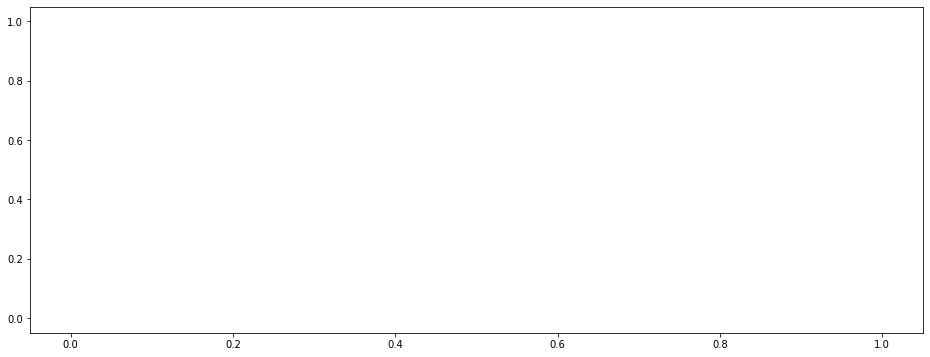

In [96]:
plt.figure(figsize=(16,6))
barwidth=0.25
for i in range(len(bar)):
    plt.bar(i,i, edgecolor='red')
